# America Company Bankrupt Prediction Random Forest Best (1)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
import keras
import pickle
from feature_engine.outliers       import Winsorizer

In [8]:
# library dibawah sebenarnya udah ada di pyforest
from sklearn.model_selection       import train_test_split
from sklearn.feature_selection     import SelectKBest, f_classif
from sklearn.preprocessing         import MinMaxScaler, StandardScaler
from sklearn.preprocessing         import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline              import make_pipeline
from sklearn.compose               import ColumnTransformer
from sklearn.metrics               import (f1_score,
                                           precision_score,
                                           recall_score,
                                           log_loss,
                                           accuracy_score,
                                           classification_report,
                                           ConfusionMatrixDisplay,
                                           confusion_matrix)


from sklearn.ensemble              import StackingClassifier
from sklearn.pipeline              import Pipeline
from sklearn.preprocessing         import StandardScaler
from sklearn_pandas                import DataFrameMapper
from sklearn.ensemble              import AdaBoostClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.linear_model          import LogisticRegression
from matplotlib.colors             import ListedColormap
from sklearn.linear_model          import SGDClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.linear_model          import SGDClassifier
from sklearn.svm                   import SVC
from sklearn.naive_bayes           import GaussianNB
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.neighbors             import NeighborhoodComponentsAnalysis
from keras.callbacks               import EarlyStopping

In [9]:
import tensorflow as tf #cek versi tensorflow
print(tf.__version__)

2.15.0


In [11]:
from google.colab import drive

In [ ]:
!pip install pandas --upgrade

In [14]:
drive.mount('/content/drive')
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/y.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
X

,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,nilai_pasar,total_aset,total_hutang_jangka_panjang,laba_kotor,total_kewajiban lancar,laba_tersisa
0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,740.998,180.447,191.226,163.816,201.026
1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,701.854,179.987,160.444,125.392,204.065
2,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,710.199,217.699,112.244,150.464,139.603
3,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,686.621,164.658,109.590,203.575,124.106
4,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,709.292,248.666,128.656,131.261,131.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,1099.101,184.666,60.885,28.197,28.095
78678,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,1865.926,770.103,231.969,88.128,157.783
78679,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,1746.235,683.985,100.784,85.765,156.341
78680,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,1736.110,694.035,95.357,82.010,135.941


In [16]:
y

,bankrupt
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
78677,0.0
78678,0.0
78679,0.0
78680,0.0


### Balancing Data
- menciptakan sampel sintetis baru dalam kelas minoritas
- menemukan titik-titik tetangga terdekat untuk setiap titik dalam kelas minoritas.
- meningkatkan jumlah sampel dalam kelas minoritas

menggunakan penyesuaian secara otomatis jumlah sampel sintesis yang dihasilkan untuk kelas minoritas yaitu bankrupt = 1

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [18]:
X_train

,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,nilai_pasar,total_aset,total_hutang_jangka_panjang,laba_kotor,total_kewajiban lancar,laba_tersisa
28505,2015,0.293,5.155,0.115,-4.323,0.000,-3.435,0.000,8.4593,0.436,0.000,-4.323,2.618,-10.527
14084,1999,41.929,58.644,5.670,-32.998,21.495,-2.279,13.576,126.9125,81.850,11.666,22.063,29.074,-25.930
27142,2007,61.575,34.884,1.453,4.172,16.891,1.948,18.832,124.5820,69.512,9.267,28.839,11.010,8.961
60448,1999,38.277,2.883,3.931,-32.371,3.182,-35.530,0.321,220.0249,66.230,0.000,-0.017,10.405,-250.351
59725,1999,69.100,65.431,1.479,-56.000,0.000,-56.135,10.532,362.2825,99.720,0.605,-56.000,22.798,-75.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2006,372.717,547.861,12.425,43.498,56.255,11.577,265.298,456.8288,949.822,215.783,167.336,375.997,92.125
54886,2002,4.876,2.369,2.581,-10.418,0.000,-21.208,1.547,6.0487,14.099,0.016,8.443,13.262,-90.593
76820,2012,185.866,133.745,11.661,23.027,49.389,11.691,28.766,176.7646,263.173,11.154,83.871,32.112,13.373
860,2003,2490.700,6357.400,161.800,847.200,909.900,405.200,1022.800,7314.6466,5878.700,1626.800,2210.200,2033.500,542.600


In [19]:
# menyeimbangkan data
balance = SMOTE(sampling_strategy='auto', random_state=42)

# melatih model dan menghasilkan sampel oversample
X_train_balance, y_train_balance = balance.fit_resample(X_train, y_train)

In [20]:
print(y_train_balance.value_counts(normalize=True))

bankrupt
0.0         0.5
1.0         0.5
Name: proportion, dtype: float64


In [21]:
print(y_train.value_counts(normalize=True))

bankrupt
0.0         0.934233
1.0         0.065767
Name: proportion, dtype: float64


Penerapan dari teknik sampling/balancing data tersebut dengan menggunakan SMOTE dengan strategi 'auto' dapat membuat atau meningkatkan sampel sintesis dalam kelas minoritas yaitu 'bankrupt' = 1

In [22]:
X_train.shape

(59011, 14)

In [23]:
X_train_balance.shape

(110260, 14)

In [24]:
ccount = y_train_balance['bankrupt'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

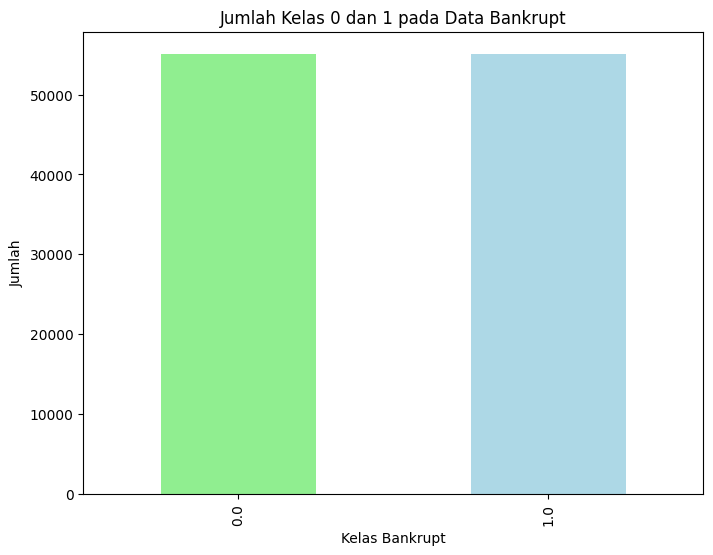

In [25]:
plt.figure(figsize=(8, 6))
ccount.plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Jumlah Kelas 0 dan 1 pada Data Bankrupt')
plt.xlabel('Kelas Bankrupt')
plt.ylabel('Jumlah')
plt.show()

## Modelling
fungsi untuk evaluasi nanti, kasus klasifikasi. menggunakan X_train_balance dan y_train_balance

Evaluasi dengan klasifikasi:
- accuracy
- precision
- recall (sensitivity)
- Specificity
- ROC-AUC
- Precision-Recall Curve and AUC
- F-beta score
- Matthews Correlation Coefficient
- Log loss

In [26]:
# y_true itu y_test
def model_report(y_true, y_pred):

    acc                     = accuracy_score(y_true, y_pred)
    pre                     = precision_score(y_true, y_pred)
    rec                     = recall_score(y_true, y_pred)
    f1                      = f1_score(y_true, y_pred)
    loss                    = log_loss(y_true, y_pred)

    print("accuracy:   {:3f}\nprecision:  {:3f}\nrecall:     {:3f}\nf1-score:   {:3f}\nloss:       {:3f}".
          format(acc, pre, rec, f1, loss))

In [27]:
knn_ball                    = KNeighborsClassifier(n_neighbors=50, algorithm="ball_tree", metric='euclidean')
random_forest               = RandomForestClassifier(max_depth=50, criterion="gini", n_estimators=38)
knn_tree                    = KNeighborsClassifier(n_neighbors=10, algorithm="kd_tree")
decision_tree               = DecisionTreeClassifier(max_depth=17, criterion="entropy")
gdb                         = GradientBoostingClassifier()
ada_boost                   = AdaBoostClassifier()
sgd                         = SGDClassifier() # gradient descent
gaussian                    = GaussianNB() #naive bayes untuk probability

<IPython.core.display.Javascript object>

In [28]:
models = {"KNN Ball"        : knn_ball,
         "KNN Tree"         : knn_tree,
         "Decision tree"    : decision_tree,
         "Random forest"    : random_forest,
         "Ada Boost"        : ada_boost,
         "Gradient Boosting": gdb,
         "Gaussian Naive"   : gaussian,
         "SGD"              : sgd}

### Melatih data

In [29]:
def model_report_train(y_true_train, y_pred_train):

    acc_train      = accuracy_score(y_true_train, y_pred_train)
    pre_train      = precision_score(y_true_train, y_pred_train)
    rec_train      = recall_score(y_true_train, y_pred_train)
    f1_train       = f1_score(y_true_train, y_pred_train)
    loss_train     = log_loss(y_true_train, y_pred_train)

    print("Train Data Metrics:")
    print("accuracy:   {:3f}\nprecision:  {:3f}\nrecall:     {:3f}\nf1-score:   {:3f}\nloss:       {:3f}".
          format(acc_train, pre_train, rec_train, f1_train, loss_train))

print("*"*50, "Performa Model ML pada Data Train", "*"*50, "\n")

for nama_model, model in models.items():

    model.fit(X_train_balance, y_train_balance)
    y_pred_train_b    = model.predict(X_train_balance)

    print(f"{nama_model}: ")

    model_report_train(y_train_balance, y_pred_train_b)

    print("="*25 + "\n")

************************************************** Performa Model ML pada Data Train ************************************************** 

KNN Ball: 
Train Data Metrics:
accuracy:   0.826637
precision:  0.758710
recall:     0.957918
f1-score:   0.846755
loss:       6.248634

KNN Tree: 
Train Data Metrics:
accuracy:   0.918901
precision:  0.861998
recall:     0.997497
f1-score:   0.924810
loss:       2.923112

Decision tree: 
Train Data Metrics:
accuracy:   0.918837
precision:  0.892009
recall:     0.953056
f1-score:   0.921523
loss:       2.925400

Random forest: 
Train Data Metrics:
accuracy:   0.999973
precision:  0.999982
recall:     0.999964
f1-score:   0.999973
loss:       0.000981

Ada Boost: 
Train Data Metrics:
accuracy:   0.712924
precision:  0.696767
recall:     0.753981
f1-score:   0.724246
loss:       10.347268

Gradient Boosting: 
Train Data Metrics:
accuracy:   0.756584
precision:  0.728245
recall:     0.818665
f1-score:   0.770813
loss:       8.773586

Gaussian Naive: 
Tr

### Pengujian Data

In [30]:
print("*"*50, "Performa Testing Model ML", "*"*50, "\n")

for nama_model, model in models.items():

    model.fit(X_train_balance, y_train_balance)
    y_pred = model.predict(X_test)

    print(f"{nama_model}: ")
    model_report(y_test, y_pred)

    print("="*25 + "\n")

************************************************** Performa Testing Model ML ************************************************** 

KNN Ball: 
accuracy:   0.690509
precision:  0.149417
recall:     0.755788
f1-score:   0.249507
loss:       11.155191

KNN Tree: 
accuracy:   0.797113
precision:  0.205333
recall:     0.690067
f1-score:   0.316493
loss:       7.312807

Decision tree: 
accuracy:   0.793452
precision:  0.177557
recall:     0.560119
f1-score:   0.269639
loss:       7.444734

Random forest: 
accuracy:   0.915612
precision:  0.399625
recall:     0.477222
f1-score:   0.434990
loss:       3.041659

Ada Boost: 
accuracy:   0.665599
precision:  0.119535
recall:     0.614638
f1-score:   0.200146
loss:       12.053030

Gradient Boosting: 
accuracy:   0.687408
precision:  0.132375
recall:     0.646751
f1-score:   0.219769
loss:       11.266963

Gaussian Naive: 
accuracy:   0.144883
precision:  0.070469
recall:     0.948469
f1-score:   0.131192
loss:       30.821529

SGD: 
accuracy:   0.7

#### Hasil analisis model
- SGD: menunjukkan performa model akurasi yang membaik, namun parameter evaluasi lainnya memiliki performa yang buruk.
- KNN Ball: Model mengalami overfitting ditunjukkan dengan nilai precision yang drastis menurun ketika model diuji/test.
- KNN Tree: Model mengalami overfitting juga dengan nilai precision yang juga drastis menurun ketika model diuji.
- Decision tree: Model sudah jelas mengalami overfit, ditunjukkan juga dengan nilai parameter precision yang drastis menurun dan juga f1-score.
- Random forest: Model mungkin sudah jelas mengalami overfitting, ditunjukkan dengan beberapa parameter evaluasi yang performanya menurun. Namun hal ini masih bisa diatasi dengan menggunakan nilai parameter yang benar dengan **Tuning**.
- Ada Boost: Modelnya overfitting
- Gradient Boosting: Modelnya overfitting juga, namun masih mungkin diterapkan **tuning**
- Gaussian Naive Bayes: Modelnya underfit
- SGD: Modelnya mungkin mengalami overfit. Namun kita coba tinjau lebih lanjut dengan **tuning**.

#### Memilih model yang tidak overfiting atau underfit untuk dilanjutkan pada tahap Hyperparameter atau Tuning


Berdasarkan hasil evaluasi **tiga model terbaik** adalah:
- [Random Forest]
- [Gradient Boost]
- [Stochastic Gradien Descent]


In [31]:
# Fungsi Evaluasi Suatu Model dengan Confusion Matrix
def plot_confusion_matriks(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tampil = ConfusionMatrixDisplay(confusion_matrix=cm)

    tampil.plot(cmap='Greys')

    plt.title('Confusion Matrix')
    plt.show()

### HyperTuning Machine Learning Model

#### Randomized Search

In [32]:
from scipy.stats import randint, uniform

list_param_rf = {'n_estimators': randint(400, 800), #random integer
                 'max_depth': randint(3, 10)}

In [ ]:
# Cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=list_param_rf,
                               n_iter=5,
                               cv=5)

random_cv.fit(X_train_balance, y_train_balance)

In [34]:
print('Tuning Hiperparameter RF: ', random_cv.best_params_)

Tuning Hiperparameter RF:  {'max_depth': 8, 'n_estimators': 595}


In [35]:
random_cv.best_params_

{'max_depth': 8, 'n_estimators': 595}

In [ ]:
rf_best = RandomForestClassifier(max_depth=8,
                                 n_estimators=595,
                                 random_state=42)

rf_best.fit(X_train_balance, y_train_balance)

In [37]:
y_tt_rf_best = rf_best.predict(X_test)

In [38]:
print('Klasifikasi Report dari Best Random Forest:')
print(classification_report(y_test, y_tt_rf_best))

Klasifikasi Report dari Best Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80     18332
         1.0       0.13      0.66      0.22      1339

    accuracy                           0.69     19671
   macro avg       0.55      0.67      0.51     19671
weighted avg       0.91      0.69      0.76     19671



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

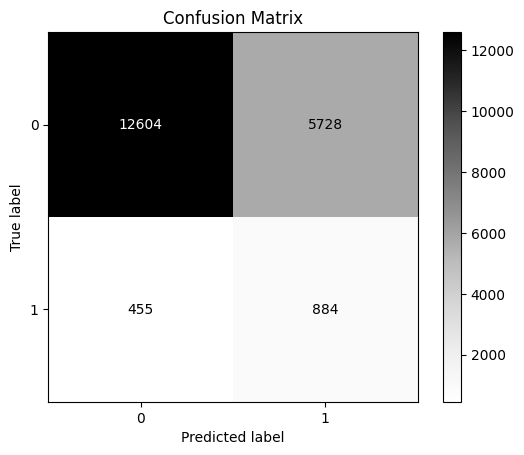

In [39]:
plot_confusion_matriks(y_test, y_tt_rf_best)

### Best Machine Learning Model

In [43]:
!pip install joblib

In [45]:
import joblib

joblib.dump(rf_best, '/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/Random Forest Best_70.pkl')

['/content/drive/MyDrive/Colab Notebooks/dataset/bankrupt/Random Forest Best_70.pkl']